# Laboratorio 1 - Inteligencia Artificial

##### José Pablo Orellana        - 21970
##### Diego Alberto Leiva        - 21752
##### Gabriel Estuardo García - 21352

# Task 1 - Regresión Lineal

#### Considera un modelo de regresión lineal con dos características, X₁ y X₂, y sus pesos correspondientes w₁ y w₂. Si el modelo predice una salida y mediante la ecuación y = 2w₁X₁ + 3w₂X₂ + 1, ¿cuál es la interpretación del coeficiente 3w₂ en el contexto del modelo?

El coeficiente 3w₂ representa la contribucion promedio al cambio de la variable de salida "y" debido a un cambio unitario en la variable independiente X₂, manteniendo contante el valor de X₁ u todas las demas variables.
Cada unidad de cambio en X₂ esta relacionado con un cambio promedio de 3w₂ unidades en la variable de salida y.
el coeficiente 3w₂ es positivo, por lo que este indica que es un aumento en X₂ el cual esta relacionado con el cambio de la variable de salida "y".
(Spiceworks, 2023)
Referencia: 
What is linear regression?- Spiceworks - Spiceworks. (2023, 3 abril). Spiceworks. https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-linear-regression/

#### Explica el concepto de multicolinealidad en el contexto de la regresión lineal. ¿Cómo afecta la multicolinealidad a la interpretación de los coeficientes de regresión individuales?

La multicolinealidad es un fenomeno en la regresion lineal que ocurre cuando dos o mas variables independentes estan altamente correlacionadas entre sí.
La multicolinealidad puede afectar en:
1. Problema de identificacion de contribuciones individuales: cuando una variable independiente esta altamente correlacionadas entre si, se vuelve dificil identificar la contribucion individual de cada variable.
2. Inestabilidad en las Estimaciones: Esta puede hacer que las estimaciones de los coeficientes sean muy sencibles a pequeños cambios en los datos.
3. Aumento en los Errores Estandar: La presencia de ella tiende a aumentar los errores estandar de las estimaciones de los coeficientes.
(Spiceworks, 2023)
Referencia:
What is linear regression?- Spiceworks - Spiceworks. (2023, 3 abril). Spiceworks. https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-linear-regression/

## Task 2 - Clasificación de Sitios de Phishing Regresión Logística y KNN

**Importar Librerias para realizar el EDA del dataset**

In [354]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Carga de los datos**

In [355]:
data = pd.read_csv('dataset_phishing.csv', sep=',')

### Exploracion del Dataset

**Estructura general**

In [356]:
data.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,phishing
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,legitimate
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,phishing
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,legitimate
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,legitimate


In [357]:
data.tail(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
11420,https://adnanboz.wordpress.com/2012/01/06/how-...,116,22,0,2,12,0,0,0,0,...,1,0,0,585,7449,0,0,0,8,legitimate
11421,http://www.peoplemakingplaces.com/includes/Sup...,117,26,0,2,1,0,0,0,0,...,1,0,0,134,2058,0,0,1,2,phishing
11422,http://sheetdownload.com/,25,17,0,1,0,0,0,0,0,...,0,0,0,144,2778,788648,0,0,2,legitimate
11423,http://www.dmega.co.kr/dmega/data/qna/sec/page...,85,15,0,4,0,0,1,0,0,...,0,1,0,293,5186,10408014,0,1,1,phishing
11424,http://www.answers.com/Q/What_are_the_sizes_of...,62,15,0,2,0,0,0,0,0,...,0,1,0,506,8829,2635,0,1,6,legitimate
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate
11429,http://174.139.46.123/ap/signin?openid.pape.ma...,477,14,1,24,0,1,1,9,0,...,1,1,1,0,-1,0,1,1,0,phishing


In [358]:
# Dimensiones del dataset
data.shape

(11430, 89)

**Estadistica descriptiva**

In [359]:
# Resumen del dataset
data.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [360]:
# Informacion general de la data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [361]:
# Presencia de valores nulos
data.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

**Balanceo del Dataset**

status
legitimate    50.0
phishing      50.0
Name: proportion, dtype: float64

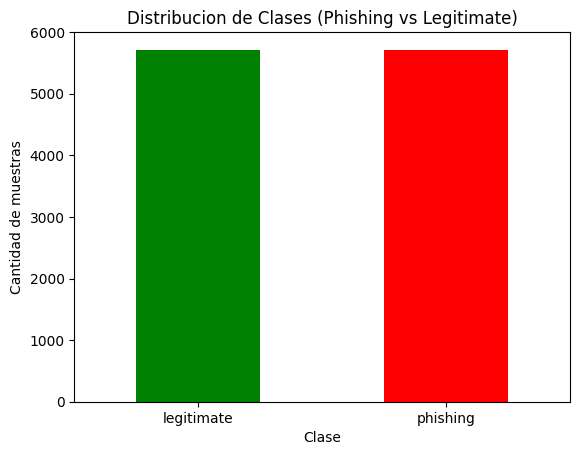

In [362]:
# Visualizacion de la distribucion de clases
data.status.value_counts().plot(kind = "bar", color=['green','red'])
plt.title("Distribucion de Clases (Phishing vs Legitimate)")
plt.xlabel("Clase")
plt.ylabel("Cantidad de muestras")
plt.xticks(rotation=0)

# Porcentaje de la distribucion de clases
data['status'].value_counts(normalize=True) * 100

No es necesario realizar un balanceo, pues el dataset ya se encuentra balanceado

**Datos atipicos**

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Boxplot Status vs Page Rank')

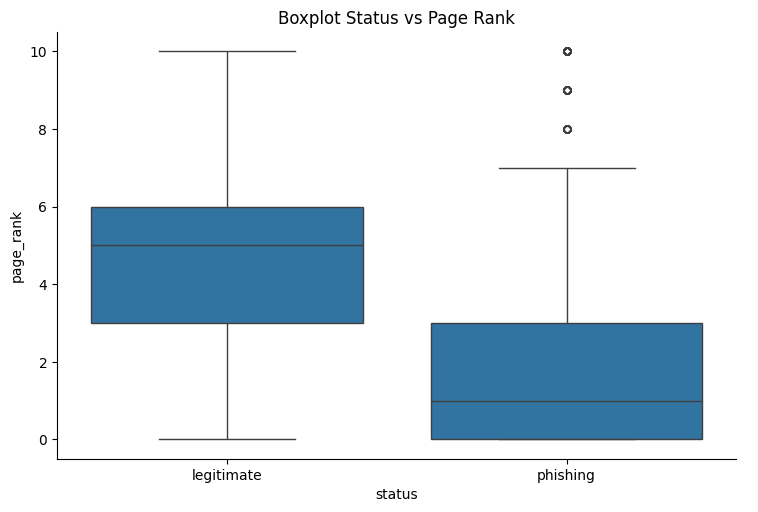

In [363]:
sns.catplot(x="status", y="page_rank", data=data, kind="box", aspect = 1.5)
plt.title("Boxplot Status vs Page Rank")

### Preprocesamiento de la data

**Encoding del dataset**

In [364]:
data['status'] = data['status'].map({'legitimate': 0, 'phishing': 1})
data.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,1
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,0
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,1
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,0
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,0


Se realizo un Label encoding unicamente a la variable de 'status', ya que esta es la variable objetivo para los modelos, ademas de que representa un valor categorico que puede ser representado de forma binaria. 
legitimate paso a ser 0.
phishing paso a ser 1.

**Escalamiento de variables**

In [365]:
# Filtrado de variables binarias (no necesitan escalado)
binary_columns = data.columns[(data.isin([0, 1]).all())]
non_binary_columns = data.columns.drop(binary_columns)
non_binary_columns = non_binary_columns.drop(['url'])
binary_columns, non_binary_columns

(Index(['ip', 'nb_or', 'nb_tilde', 'nb_star', 'nb_dslash', 'https_token',
        'punycode', 'port', 'tld_in_path', 'tld_in_subdomain',
        'abnormal_subdomain', 'prefix_suffix', 'random_domain',
        'shortening_service', 'path_extension', 'nb_external_redirection',
        'domain_in_brand', 'brand_in_subdomain', 'brand_in_path',
        'suspecious_tld', 'ratio_nullHyperlinks', 'ratio_intRedirection',
        'ratio_intErrors', 'login_form', 'external_favicon', 'submit_email',
        'sfh', 'iframe', 'popup_window', 'onmouseover', 'right_clic',
        'empty_title', 'domain_in_title', 'domain_with_copyright',
        'whois_registered_domain', 'dns_record', 'google_index', 'status'],
       dtype='object'),
 Index(['length_url', 'length_hostname', 'nb_dots', 'nb_hyphens', 'nb_at',
        'nb_qm', 'nb_and', 'nb_eq', 'nb_underscore', 'nb_percent', 'nb_slash',
        'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space',
        'nb_www', 'nb_com', 'http_in_path'

In [366]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Escalamiento de columnas
data[non_binary_columns] = scaler.fit_transform(data[non_binary_columns])
data.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,0.015347,0.071429,0,0.086957,0.000000,0.0,0.000000,0.000000,0,...,0,1,0,0.001542,0.000854,0.000000,1,1,0.4,0
1,http://shadetreetechnology.com/V4/validation/a...,0.039902,0.090476,1,0.000000,0.000000,0.0,0.000000,0.000000,0,...,1,0,0,0.002615,0.448471,0.000000,0,1,0.2,1
2,https://support-appleld.com.secureupdate.duila...,0.069982,0.219048,1,0.130435,0.023256,0.0,0.333333,0.105263,0,...,1,0,0,0.000503,0.311656,0.541310,0,1,0.0,1
3,http://rgipt.ac.in,0.003683,0.033333,0,0.043478,0.000000,0.0,0.000000,0.000000,0,...,1,0,0,0.002112,0.000854,0.010004,0,0,0.3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,0.026397,0.052381,0,0.043478,0.046512,0.0,0.000000,0.000000,0,...,0,1,0,0.007543,0.635341,0.000810,0,0,0.6,0
5,http://appleid.apple.com-app.es/,0.012277,0.095238,0,0.086957,0.023256,0.0,0.000000,0.000000,0,...,1,1,1,0.000034,0.000854,0.000000,0,1,0.0,1
6,http://www.mutuo.it,0.004297,0.038095,0,0.043478,0.000000,0.0,0.000000,0.000000,0,...,0,1,0,0.005732,0.585209,0.000000,0,0,0.1,0
7,http://www.shadetreetechnology.com/V4/validati...,0.042357,0.109524,1,0.043478,0.000000,0.0,0.000000,0.000000,0,...,1,0,0,0.002581,0.448471,0.000000,0,1,0.2,1
8,http://vamoaestudiarmedicina.blogspot.com/,0.018416,0.142857,0,0.043478,0.000000,0.0,0.000000,0.000000,0,...,1,1,0,0.012471,0.567282,0.000000,0,0,0.5,0
9,https://parade.com/425836/joshwigler/the-amazi...,0.056476,0.028571,0,0.000000,0.232558,0.0,0.000000,0.000000,0,...,1,0,0,0.004325,0.727922,0.000629,0,0,0.5,0


Se realizo un escalado min-max con la herramienta MinMaxScaler de sklearn. El rango predefinido del escalado es de [0,1]. Unicamente se omitio la variable url, debido a que es un valor identificador.
No se omitieron variables con valores binarios debido a que la herramienta MinMaxScaler no modifica los valores si estos se encuentran dentro del rango, el unico cambio es que ahora son 0.0 o 1.0, lo cual sigue representando lo mismo.

### Seleccion de Variables

**Correlacion de variables**

Text(0.5, 1.0, 'Mapa de Calor de la Matriz de Correlacion de variables no binarias')

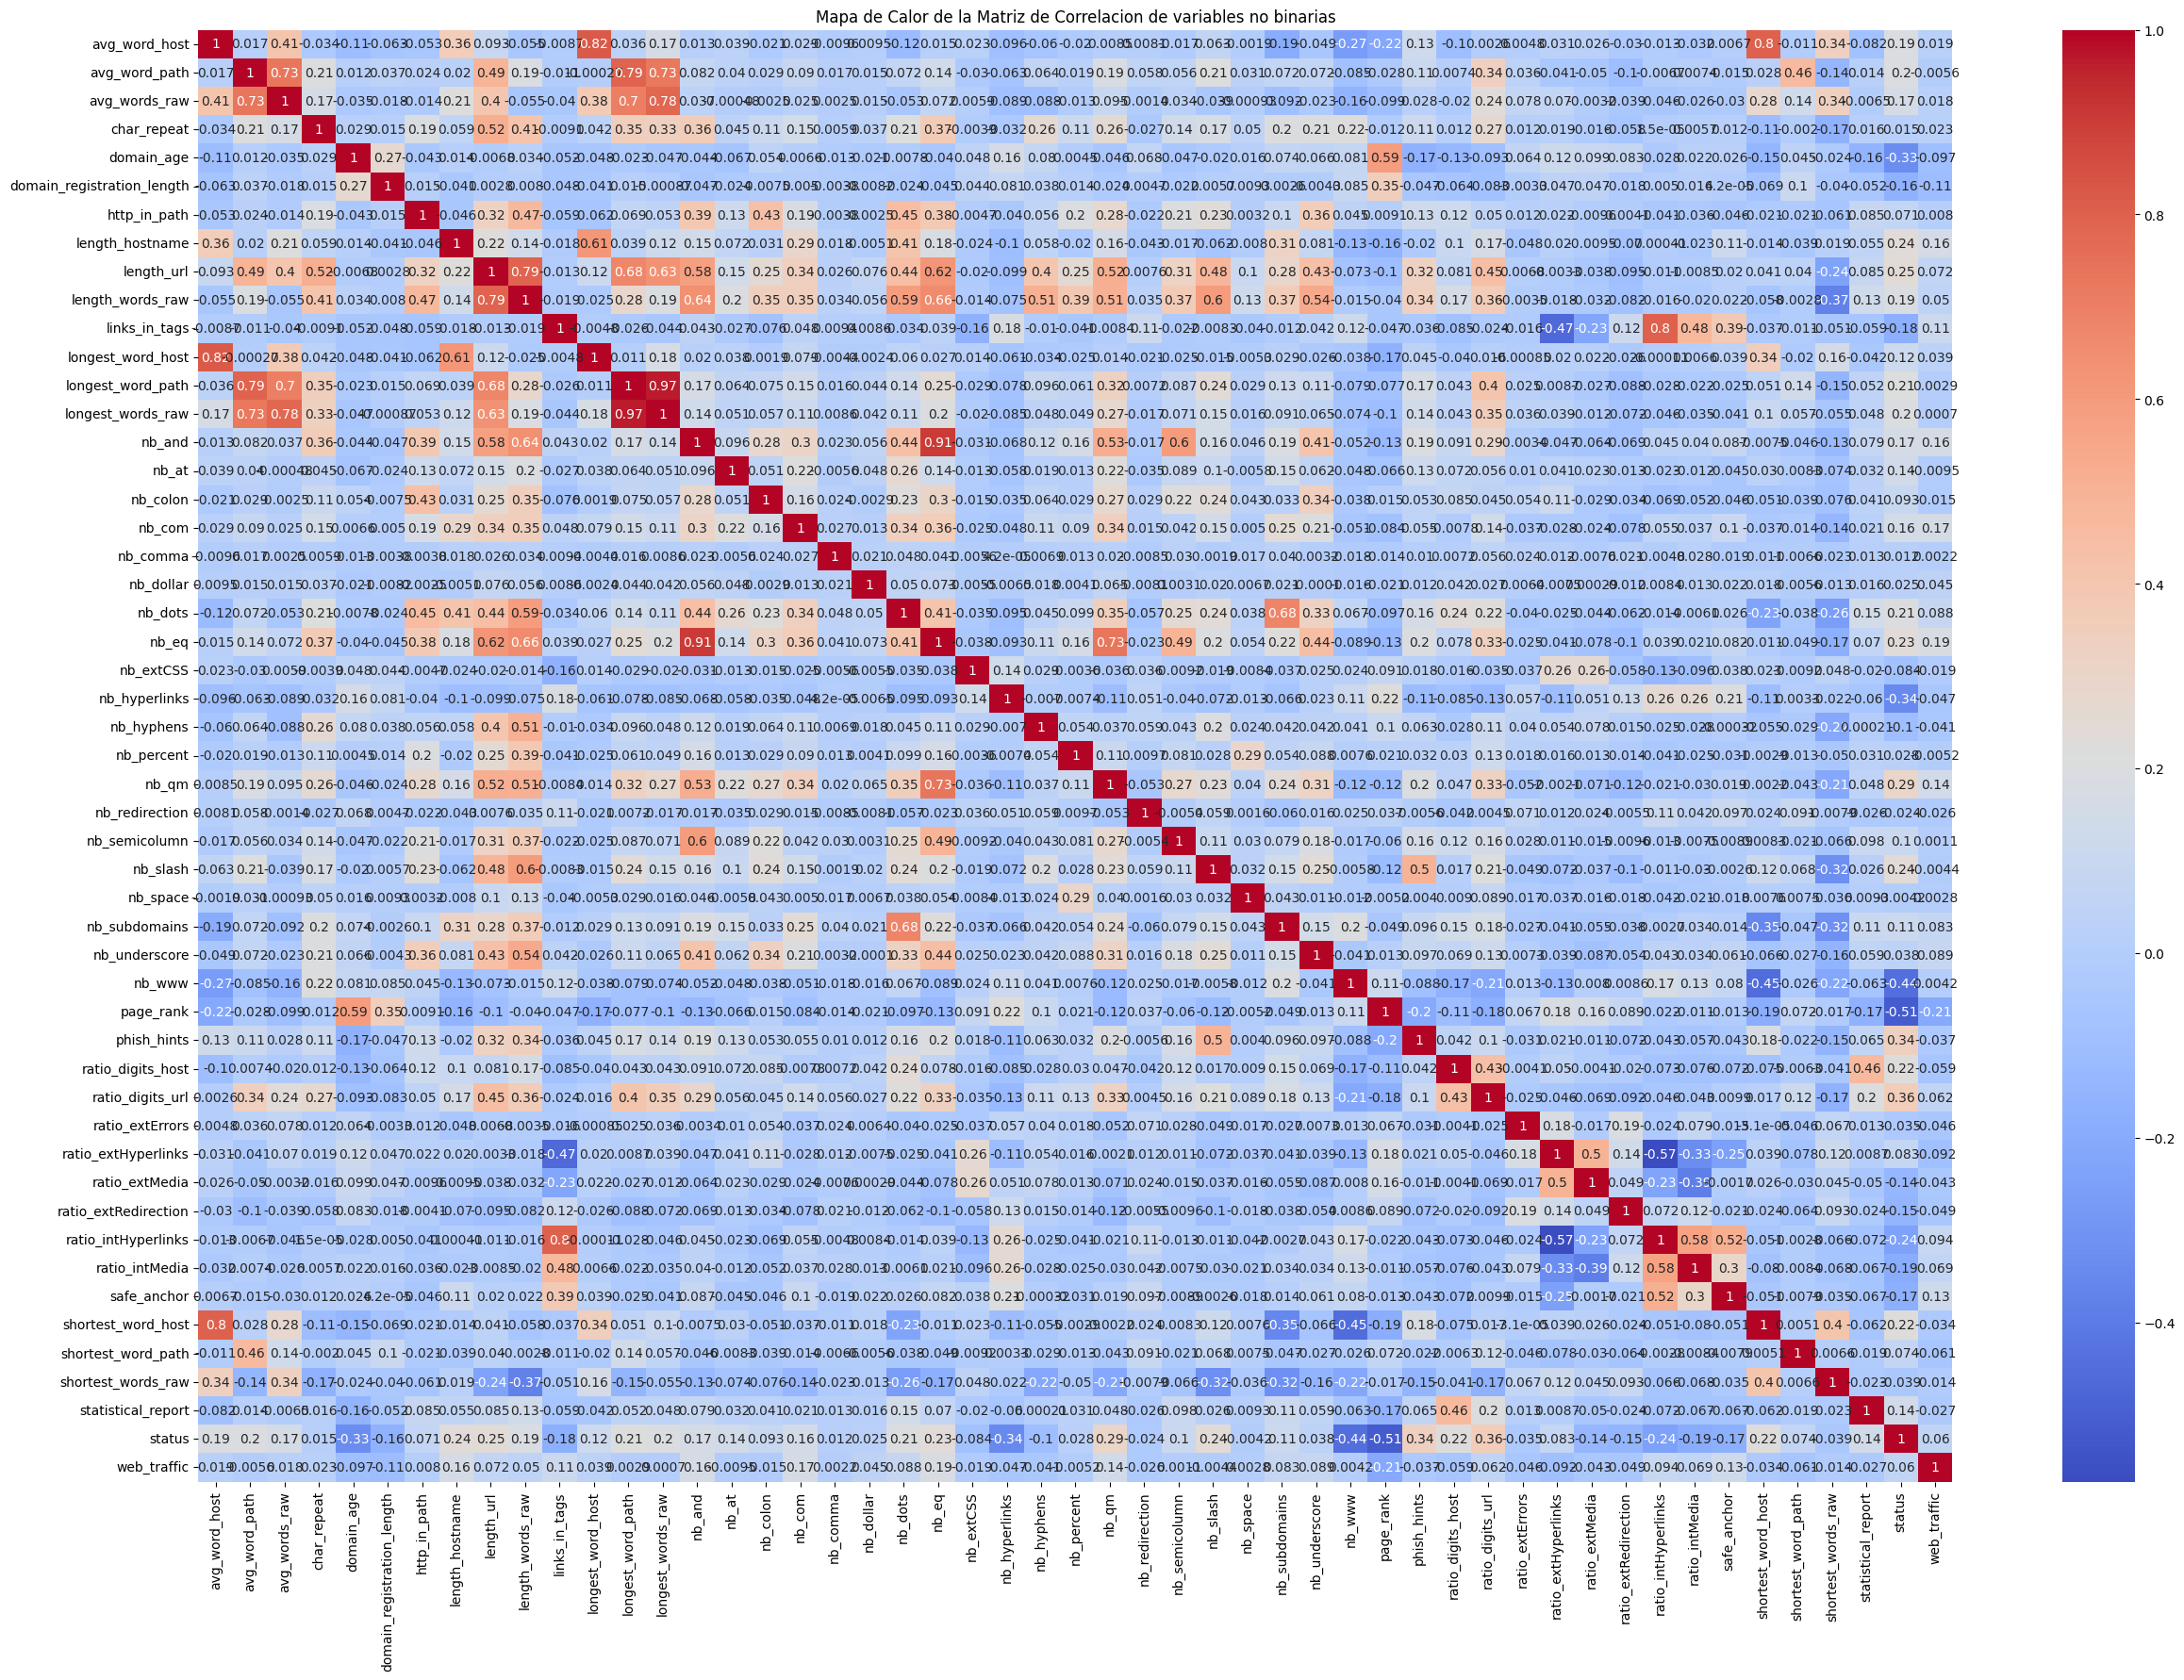

In [367]:
plt.figure(figsize=(30, 20))
non_binary_columns = non_binary_columns.union(['status'])

# Calculo de matriz de correlacion de variables no binarias
correlation_matrix = data[non_binary_columns].corr()

# Mapa de calor 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de la Matriz de Correlacion de variables no binarias')

Text(0.5, 1.0, 'Mapa de Calor de la Matriz de Correlacion de variables binarias')

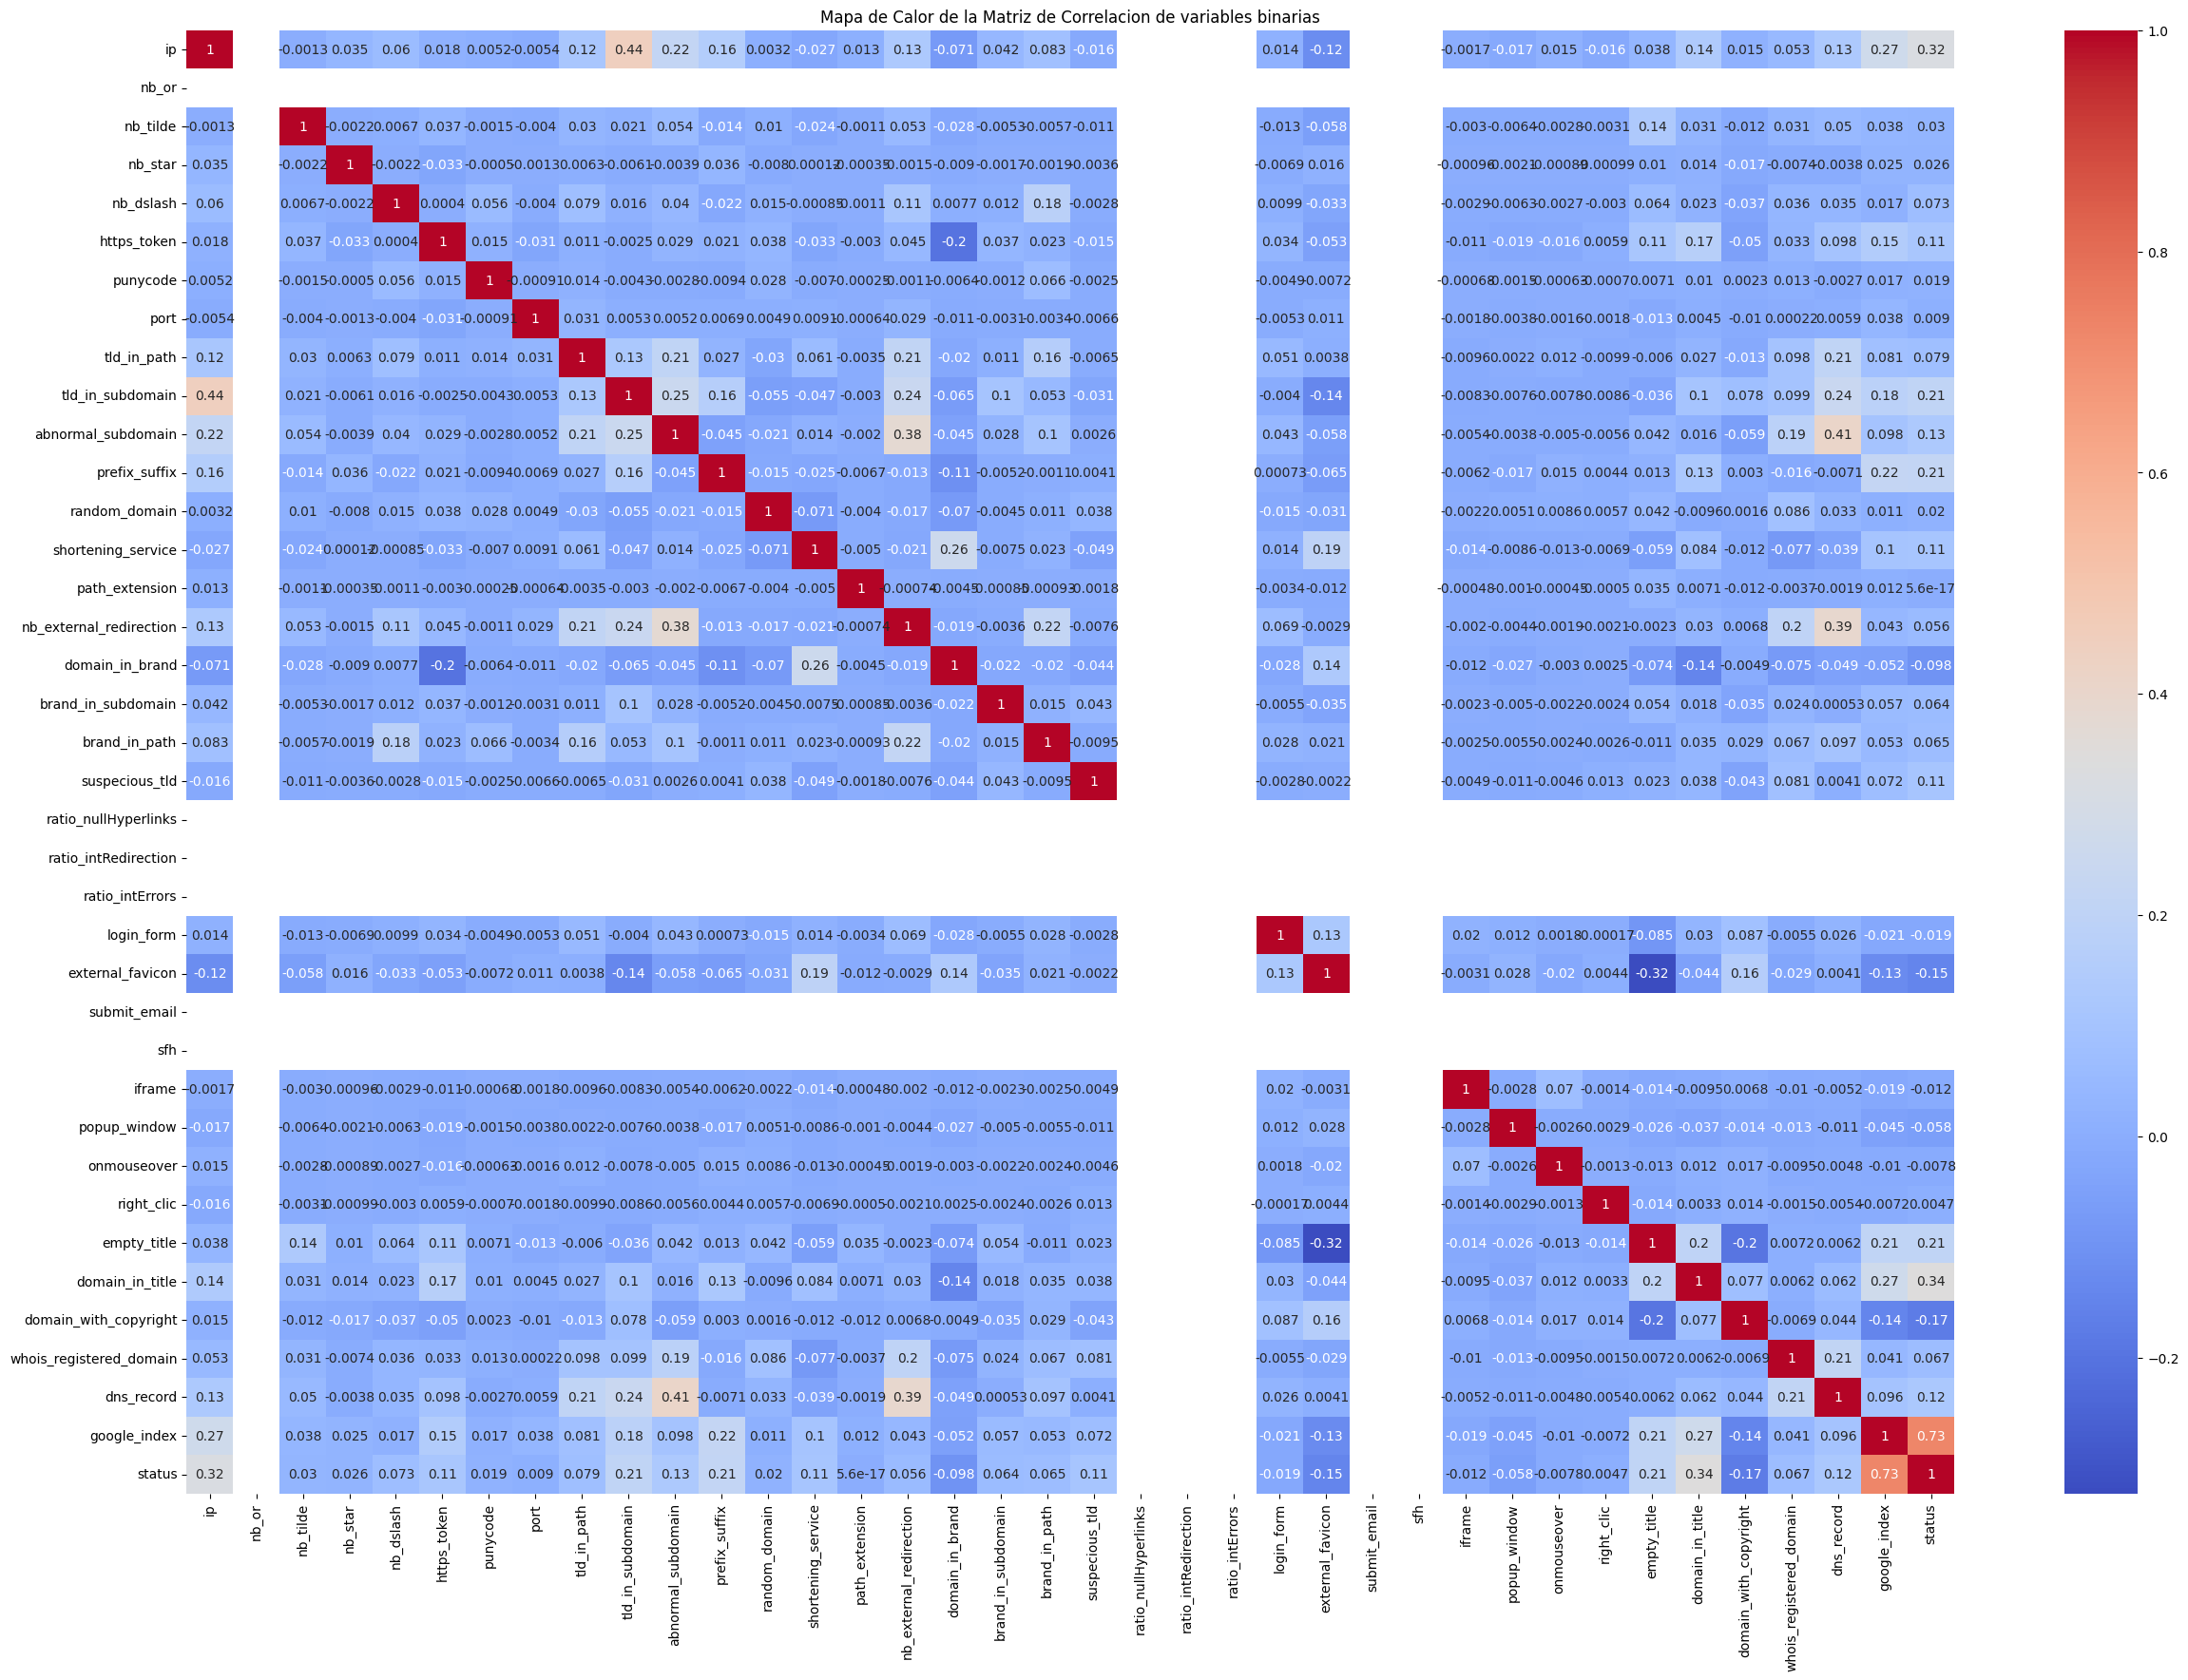

In [368]:
plt.figure(figsize=(30, 20))

# Calculo de matriz de correlacion de variables binarias
bin_correlation_matrix = data[binary_columns].corr()

# Mapa de calor 
sns.heatmap(bin_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de la Matriz de Correlacion de variables binarias')

Nota: Para evitar que el heatmap no se entienda se elimino la anotacion de valores

**Seleccion de carcacteristicas con mayor correlacion con la variable objetivo**

In [369]:
# Correlaciones mas altas con variables no binarias
correlations_with_status = correlation_matrix['status'].drop(labels=['status'])
top_correlation = correlations_with_status.abs().sort_values(ascending=False)
top_10_correlated = top_correlation.head(10)
top_10_correlated

page_rank              0.511137
nb_www                 0.443468
ratio_digits_url       0.356395
nb_hyperlinks          0.342628
phish_hints            0.335393
domain_age             0.331889
nb_qm                  0.294319
length_url             0.248580
ratio_intHyperlinks    0.243982
nb_slash               0.242270
Name: status, dtype: float64

In [370]:
# Correlaciones mas altas con variables binarias
bin_correlations_with_status = bin_correlation_matrix['status'].drop(labels=['status'])
bin_top_correlation = bin_correlations_with_status.abs().sort_values(ascending=False)
bin_top_10_correlated = bin_top_correlation.head(10)
bin_top_10_correlated

google_index             0.731171
domain_in_title          0.342807
ip                       0.321698
prefix_suffix            0.214681
tld_in_subdomain         0.208884
empty_title              0.207043
domain_with_copyright    0.173098
external_favicon         0.146565
abnormal_subdomain       0.128160
dns_record               0.122119
Name: status, dtype: float64

In [371]:
# top 5 variables con correlaciones mas altas
combined_top_correlated = pd.concat([bin_top_10_correlated, top_10_correlated])
combined_top_correlated_sorted = combined_top_correlated.sort_values(ascending=False)
top_correlated = combined_top_correlated_sorted.head(5)
top_correlated

google_index        0.731171
page_rank           0.511137
nb_www              0.443468
ratio_digits_url    0.356395
domain_in_title     0.342807
Name: status, dtype: float64

**Variables seleccionadas**

Se han seleccionado las 5 variables con mayor correlacion respecto al status. 
Estas son:
- google_index
- page_rank
- nb_www
- ratio_digital_url
- domain_in_title


### Split del dataset

In [372]:
from sklearn.model_selection import train_test_split

X = data[top_correlated.index]  # caracteristicas seleccionadas
y = data['status']  # Target

# Split en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Metrica de desempeño principal
La metrica de desempeño principal seleccinoada es el "F1 Score".

**Justificacion**
La puntuacion F1 proporciona un balance entre la presicion y el Recall. Es decir la exactitud de las predicciones positivas y la proporcion de positivos reales identificados de forma correcta. Esto es de suma importancia cuando se trata de detectar phishing, ya que de esta forma se puede minimizar los falsos positivos y los falsos negativos. 
En el contexto del problema, tanto el bloquear sitios legitimos, como permitir los sitios phishing, tiene consecuencias negativas en el usuario final. Con esto en cuenta la puntuacion F1 equilibra ambas preocupaciones, permitiendo evalual la capacidad del modelo para clasificar correctamente los sitios web.

**Referencias**
- Blog, D. C. (2024). Understanding F1 score, accuracy, ROC-AUC, and PR-AUC metrics for models. Deepchecks. https://deepchecks.com/f1-score-accuracy-roc-auc-and-pr-auc-metrics-for-models/ 
- Czakon, J. (2023, 5 septiembre). F1 Score vs ROC AUC vs Accuracy vs PR AUC: Which evaluation metric should you choose? neptune.ai. https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

# Task 2.1 - Regresión Logística

### Algoritmo sin librerias

**Seleccion de variables para visualizacion**

In [373]:
X_train_vis = X_train[['google_index', 'page_rank']].values
X_test_vis = X_test[['google_index', 'page_rank']].values

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

**Algoritmo de Regresion Logistica**

In [374]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def loss(y, y_hat):
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

def gradients(X, y, y_hat):
    m = X.shape[0]
    dw = (1 / m) * np.dot(X.T, (y_hat - y))
    db = (1 / m) * np.sum(y_hat - y)
    return dw, db

def normalize(X):
    m, n = X.shape
    for i in range(n):
        X[:, i] = (X[:, i] - np.mean(X[:, i])) / np.std(X[:, i])
    return X

def train(X, y, bs, epochs, lr):
    m, n = X.shape
    w = np.zeros((n, 1))
    b = 0

    x = normalize(X.copy())  # Normalizando las entradas

    losses = []

    for epoch in range(epochs):
        for i in range((m - 1) // bs + 1):
            start_i = i * bs
            end_i = start_i + bs
            xb = x[start_i:end_i]
            yb = y[start_i:end_i]

            y_hat = sigmoid(np.dot(xb, w) + b)
            dw, db = gradients(xb, yb, y_hat)

            w -= lr * dw
            b -= lr * db

        l = loss(y, sigmoid(np.dot(x, w) + b))
        losses.append(l)

    return w, b, losses

def predict(X, w, b):
    X = normalize(X.copy())  # Normalizando las entradas
    preds = sigmoid(np.dot(X, w) + b)
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    return np.array(pred_class)


**Referencia de codigo**
- https://towardsdatascience.com/logistic-regression-from-scratch-in-python-ec66603592e2

**Entrenamiento del Modelo**

In [375]:
w, b, losses = train(X_train_vis, y_train, bs=100, epochs=1000, lr=0.01)

**Evaluacion del modelo**

In [376]:
from sklearn.metrics import f1_score

# Haciendo predicciones en los conjuntos de entrenamiento y prueba
y_pred_train = predict(X_train_vis, w, b)
y_pred_test = predict(X_test_vis, w, b)

# Calculando F1 Score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print(f'F1 Score on Training Data: {f1_train}')
print(f'F1 Score on Test Data: {f1_test}')


F1 Score on Training Data: 0.8641706573791903
F1 Score on Test Data: 0.875


**Visualizacion de Resultados**

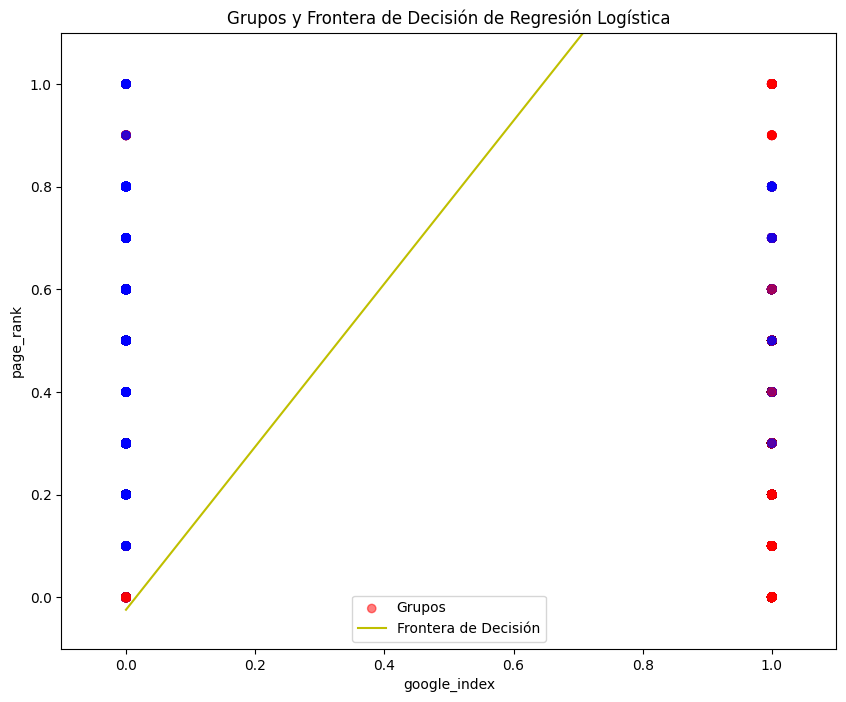

In [377]:
def plot_decision_boundary(X, y, w, b):
    x1 = [min(X[:, 0]), max(X[:, 0])]
    m = -w[0] / w[1]
    c = -b / w[1]
    x2 = m * x1 + c
    
    plt.figure(figsize=(10, 8))

    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr', alpha=0.5, label='Grupos')

    plt.plot(x1, x2, 'y-', label='Frontera de Decisión')
    
    plt.xlim([X[:, 0].min() - 0.1, X[:, 0].max() + 0.1])
    plt.ylim([X[:, 1].min() - 0.1, X[:, 1].max() + 0.1])
    plt.xlabel('google_index')
    plt.ylabel('page_rank')
    plt.title('Grupos y Frontera de Decisión de Regresión Logística')
    plt.legend()
    plt.show()

plot_decision_boundary(X_train_vis, y_train, w, b)



Nota: Debido a que la variable seleccionada google index es una variable binaria, unicamente hay 2 valores en X.

**Consideraciones**
- Unicamente se seleccionaron 2 features de todas las que habian
- Una de las features es de valores binarios
- Se tenia una muy buena referencia, pero fue necesario adaptarla al codigo con los dataset preprocesados anteriormente.
- Los hiperparametros no fueron afinados lo mejor posible

### Algoritmo con librerias

In [378]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Creacion y Entrenamiento del Modelo**

In [379]:
# Crear y entrenar el modelo con las dos características seleccionadas
logreg_model = LogisticRegression()
logreg_model.fit(X_train_vis, y_train.ravel())

LogisticRegression()

**Predicciones y Evaluacion**

In [380]:
# Hacer predicciones en el conjunto de prueba
logreg_predictions_vis = logreg_model.predict(X_test_vis)
# Evaluar la precisión del modelo
logreg_accuracy_vis = accuracy_score(y_test.ravel(), logreg_predictions_vis)
print(f'Precisión del modelo de Regresión Logística: {logreg_accuracy_vis}')
# Hacer predicciones en el conjunto de entrenamiento para calcular F1 Score
y_pred_train_vis = logreg_model.predict(X_train_vis)

# Obteniendo el valor F1
f1_train_lib_vis = f1_score(y_train.ravel(), y_pred_train_vis)
f1_test_lib_vis = f1_score(y_test.ravel(), logreg_predictions_vis)

print(f'F1 Score con Training Data: {f1_train_lib_vis}')
print(f'F1 Score con Test Data: {f1_test_lib_vis}')



Precisión del modelo de Regresión Logística: 0.8757655293088364
F1 Score con Training Data: 0.8641706573791903
F1 Score con Test Data: 0.875


**Visualizacion de Resultados**

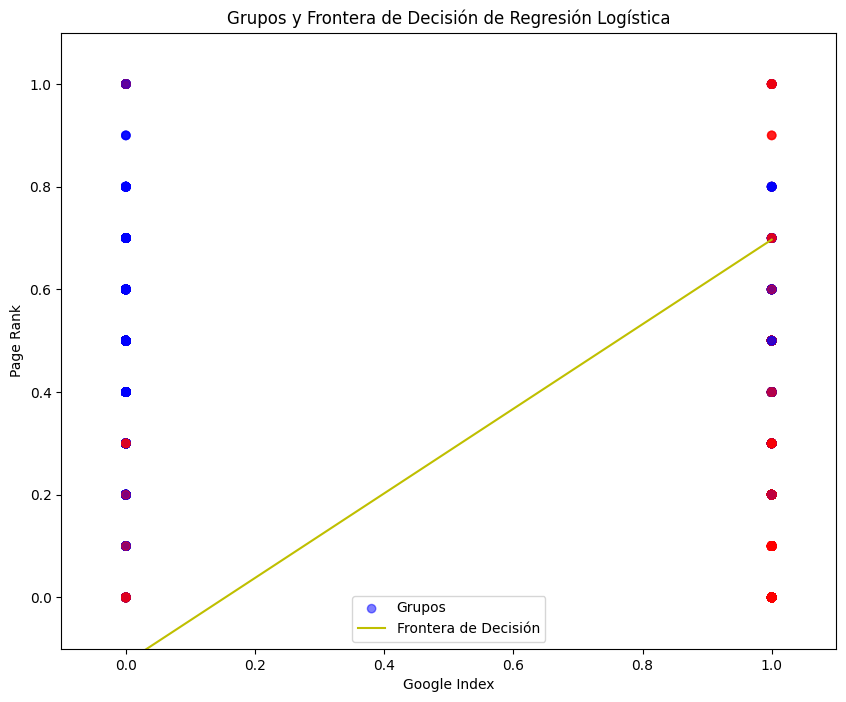

In [381]:
def plot_decision_boundary_sklearn(X, y, model):
    # Coeficientes y sesgo
    w = model.coef_[0]
    b = model.intercept_

    # Límites de la gráfica
    x1 = np.array([min(X[:, 0]), max(X[:, 0])])
    m = -w[0] / w[1]
    c = -b / w[1]
    x2 = m * x1 + c

    plt.figure(figsize=(10, 8))

    # Dibujar los puntos
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr', alpha=0.5, label='Grupos')

    # Dibujar la frontera de decisión
    plt.plot(x1, x2, 'y-', label='Frontera de Decisión')

    plt.xlim([X[:, 0].min() - 0.1, X[:, 0].max() + 0.1])
    plt.ylim([X[:, 1].min() - 0.1, X[:, 1].max() + 0.1])
    plt.xlabel('Google Index')
    plt.ylabel('Page Rank')
    plt.title('Grupos y Frontera de Decisión de Regresión Logística')
    plt.legend()
    plt.show()

# Llamar a la función con tus datos
plot_decision_boundary_sklearn(X_test_vis, y_test, logreg_model)


**Mejor Implementacion**
Si bien la implementacion desde 0 tiene un F1 score ligeramente superior a la implementacion con librerias, la diferencia es minima. Por lo tanto ambos modelos han aprendido de una forma muy similar.
Ahora bien, analizando los tiempos de ejecucion que le tomo a cada implementacion el entrenarse y predecir, si es visible una clara diferencia. La implementacion desde 0 tarde casi 3 segundos en entrenarse, mientras que la implementacion con librerias fue tan veloz que el tiempo parece ser 0 segundos.
Por consiguiente, es posible afirmar que la implementacion con librerias fue la mejor de las 2. Esto ya que es mas valioso el tener un algoritmo optimizado que implemente menos recursos y en cambio perder milecimas de puntaje, lo que visto desde el mundo real, es algo que sera muy poco perceptible.

# Task 2.2 - K-Nearest Neighbors

### Algoritmo desde 0

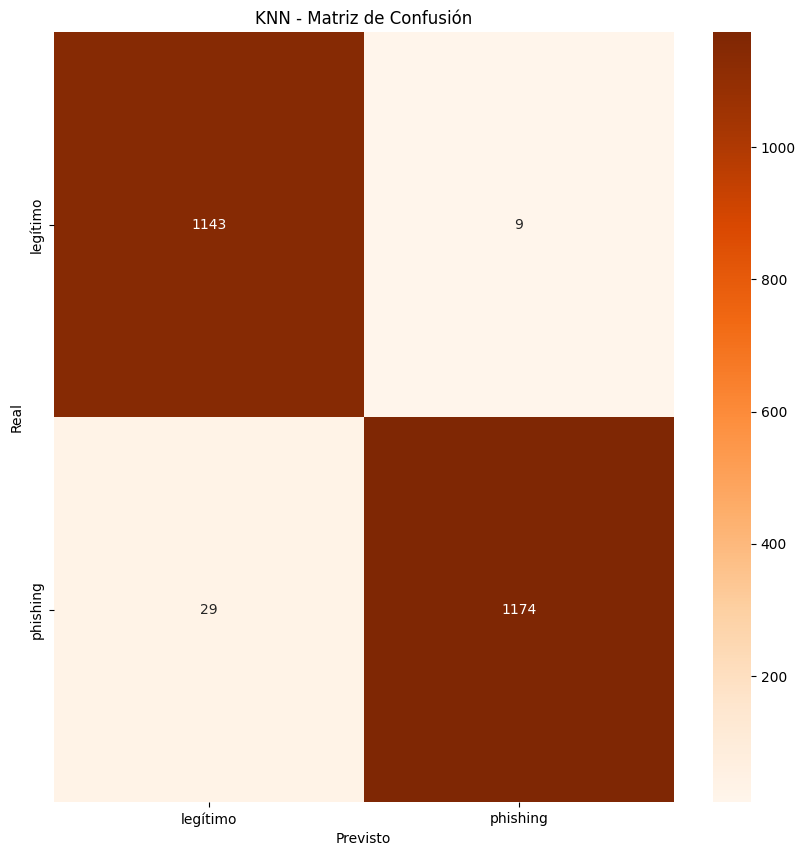

F1 Score: 0.9840737636211232
Exactitud: 0.983864118895966


In [382]:
# Seleccionar solo columnas numéricas
cols_numericas = data.select_dtypes(include=np.number).columns

# Definir variables predictoras (X) y variable objetivo (y)
X_datos = data[cols_numericas]
y_resultado = data.iloc[:, -1]  # La última columna es el resultado (status) de phishing

# Dividir los datos en conjuntos de entrenamiento y prueba sin usar train_test_split
np.random.seed(0)
mask_prueba = np.random.rand(len(data)) < 0.2
X_entrenamiento = X_datos[~mask_prueba]
X_prueba = X_datos[mask_prueba]
y_entrenamiento = y_resultado[~mask_prueba]
y_prueba = y_resultado[mask_prueba]


# Clasificador KNN personalizado
class MiClasificadorKNN:
    def __init__(self, k=3, p=2):
        self.k = k
        self.p = p

    def ajustar(self, X_entrenamiento, y_entrenamiento):
        self.X_entrenamiento = X_entrenamiento
        self.y_entrenamiento = y_entrenamiento

    def predecir(self, X_prueba):
        y_pred = np.array([self._predecir(x) for x in X_prueba])
        return y_pred
    
    def _predecir(self, x):
        distancias = np.array([self._distancia_euclidiana(x, x_entrenamiento) for x_entrenamiento in self.X_entrenamiento])
        indices_mas_cercanos = np.argsort(distancias)[:self.k]
        etiquetas_mas_cercanas = self.y_entrenamiento[indices_mas_cercanos]  # Acceder directamente al arreglo
        etiquetas_unicas, conteos = np.unique(etiquetas_mas_cercanas, return_counts=True)
        etiqueta_predicha = etiquetas_unicas[np.argmax(conteos)]
        return etiqueta_predicha
    
    def _distancia_euclidiana(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

# Crear y entrenar el clasificador KNN personalizado
mi_clasificador = MiClasificadorKNN(k=47, p=2)
mi_clasificador.ajustar(X_entrenamiento.values, y_entrenamiento.values)

# Predecir los resultados en el conjunto de prueba
y_prediccion = mi_clasificador.predecir(X_prueba.values)


# Calcular la matriz de confusión manualmente
etiquetas_unicas = np.unique(y_prueba)
matriz_confusion = np.zeros((len(etiquetas_unicas), len(etiquetas_unicas)), dtype=int)

for i, real in enumerate(etiquetas_unicas):
    for j, pred in enumerate(etiquetas_unicas):
        matriz_confusion[i, j] = np.sum((y_prueba == real) & (y_prediccion == pred))

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 10))
sns.heatmap(matriz_confusion, annot=True, fmt='g', cmap='Oranges', xticklabels=['legítimo', 'phishing'], yticklabels=['legítimo', 'phishing'])
plt.title('KNN - Matriz de Confusión')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Calcular F1 Score y Exactitud manualmente
verdaderos_positivos = np.diag(matriz_confusion)
falsos_positivos = np.sum(matriz_confusion, axis=0) - verdaderos_positivos
falsos_negativos = np.sum(matriz_confusion, axis=1) - verdaderos_positivos

precision = verdaderos_positivos / (verdaderos_positivos + falsos_positivos)
recall = verdaderos_positivos / (verdaderos_positivos + falsos_negativos)

f1 = 2 * (precision * recall) / (precision + recall)
exactitud = np.sum(verdaderos_positivos) / len(y_prueba)

print(f'F1 Score: {f1[1]}')  # F1 Score para la clase 'phishing'
print(f'Exactitud: {exactitud}')

### Algoritmo con librerias

In [383]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [384]:
scaler = StandardScaler()
scaler.fit(X_entrenamiento) 

X_entrenamiento = scaler.transform(X_entrenamiento)
X_prueba = scaler.transform(X_prueba)

In [385]:
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_entrenamiento, y_entrenamiento)

KNeighborsClassifier()

In [386]:
y_pred = model.predict(X_prueba)

In [387]:
print("\nInforme de Clasificación:")
print(classification_report(y_prueba, y_pred))



Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1152
           1       0.98      0.96      0.97      1203

    accuracy                           0.97      2355
   macro avg       0.97      0.97      0.97      2355
weighted avg       0.97      0.97      0.97      2355



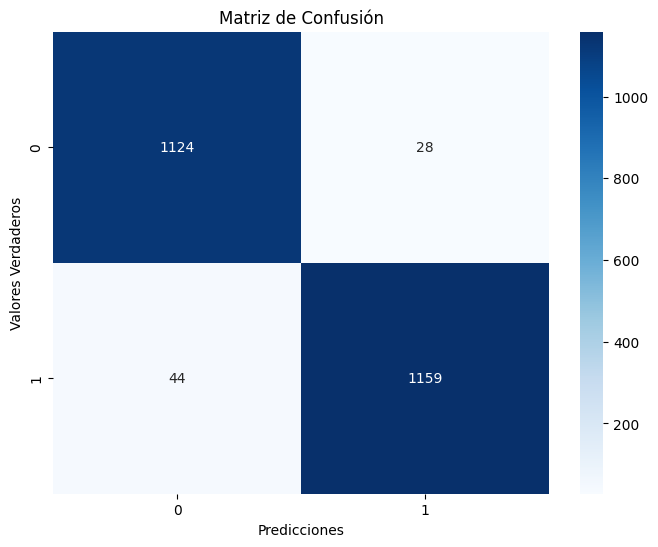

In [388]:
conf_mat = confusion_matrix(y_prueba, y_pred)

# Usar heatmap de seaborn para una mejor visualización
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()


**Consideraciones**
- el hiperparametro k fue seleccionado al azar
- unicamente se tomaron en cuenta valores numericos para el data set
- Conocimiento sobre el calculo euclediana
- Implementacion bastante basica

**Mejor implementacion**
De forma similar al caso de la regresion logistica, nuevamente se encuentra el caso de que la implementacion desde 0 es ligeramente superior a la implementacion con librerias.
Sin embargo, a pesar de haber variado 1 centesima, la implementacion desde 0 tomo hasta mas de 3 minutos en completarse. Por lo tanto, se concluye que la implementacion con librerias fue la mejor de las 2 debido a su eficiencia computacional.

# Enlace de repositorio en GitHub

**https://github.com/Gegdgt/Lab_1_IA.git**